### Importing necessary libraries

In [4]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hamza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hamza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.model_selection import GridSearchCV

### 1. Data Preprocessing

Load the dataset

In [11]:
df = pd.read_csv("Abnb_paris.csv",index_col=0)
df.head()

,reviews,savwish,logreviews,logsavwish,price,rating,accommodates,extpeop,min_stay,sentiment,secdep,cleanfee,weekfee,monthfee,bedroom,bathroom,beds,review_text
1,10,1277,1.041393,3.106531,185,4.5,3,1,5,3.208943,1,1,1,1,1,1,1,Even if i stayed at another apartment the stay...
2,8,279,0.954243,2.447158,100,5.0,2,0,3,2.245883,0,0,0,0,1,1,1,"Exactly what you can see on the pictures, plus..."
3,31,434,1.505150,2.638489,512,5.0,10,1,3,2.509137,1,0,1,1,4,3,5,We were five colleagues staying in Lea's apart...
4,65,784,1.819544,2.894870,92,4.5,2,0,2,2.864322,0,0,1,1,1,1,1,"It was perfect! The location is great, easy to..."
5,9,621,1.000000,2.793790,71,4.5,4,1,1,1.892305,1,1,0,0,2,1,1,"Saras flat is nice and clean, she was the perf..."


In [12]:
df.describe()

,reviews,savwish,logreviews,logsavwish,price,rating,accommodates,extpeop,min_stay,sentiment,secdep,cleanfee,weekfee,monthfee,bedroom,bathroom,beds
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,40.393939,654.924242,1.322895,2.575108,156.151515,4.765152,3.363636,0.363636,2.272727,2.345701,0.636364,0.439394,0.636364,0.606061,1.242424,1.075758,1.681818
std,43.934174,676.399798,0.569762,0.522341,120.149553,0.280380,1.966147,0.484732,1.259370,0.630660,0.484732,0.500117,0.484732,0.492366,0.804996,0.615457,1.290904
min,1.000000,13.000000,0.301030,1.146128,40.000000,4.000000,1.000000,0.000000,1.000000,0.810741,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7.250000,189.000000,0.915878,2.278594,98.000000,4.500000,2.000000,0.000000,1.000000,1.843812,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,25.000000,449.500000,1.413685,2.653692,123.000000,5.000000,3.000000,0.000000,2.000000,2.330250,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,64.750000,841.000000,1.817886,2.924970,181.750000,5.000000,4.000000,1.000000,3.000000,2.825839,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,218.000000,3429.000000,2.340444,3.535294,853.000000,5.000000,11.000000,1.000000,5.000000,4.142957,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,8.000000


Preprocess the text data by removing stopwords, punctuation, and performing 
tokenization

In [13]:
df.dropna(subset=['review_text', 'sentiment'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 1 to 75
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   reviews       66 non-null     int64  
 1   savwish       66 non-null     int64  
 2   logreviews    66 non-null     float64
 3   logsavwish    66 non-null     float64
 4   price         66 non-null     int64  
 5   rating        66 non-null     float64
 6   accommodates  66 non-null     int64  
 7   extpeop       66 non-null     int64  
 8   min_stay      66 non-null     int64  
 9   sentiment     66 non-null     float64
 10  secdep        66 non-null     int64  
 11  cleanfee      66 non-null     int64  
 12  weekfee       66 non-null     int64  
 13  monthfee      66 non-null     int64  
 14  bedroom       66 non-null     int64  
 15  bathroom      66 non-null     int64  
 16  beds          66 non-null     int64  
 17  review_text   66 non-null     object 
dtypes: float64(4), int64(13), object

In [15]:
stop_words = set(stopwords.words('english'))

df['sentiment'] = np.where(df['sentiment'] >= 2.5, 1, 0)

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords and punctuation
    filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word.lower() not in string.punctuation]
    # Join tokens back into a string
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

df['proc_review'] = df['review_text'].apply(preprocess_text)


In [16]:
df.head()

,reviews,savwish,logreviews,logsavwish,price,rating,accommodates,extpeop,min_stay,sentiment,secdep,cleanfee,weekfee,monthfee,bedroom,bathroom,beds,review_text,proc_review
1,10,1277,1.041393,3.106531,185,4.5,3,1,5,1,1,1,1,1,1,1,1,Even if i stayed at another apartment the stay...,even stayed another apartment stay perfect nic...
2,8,279,0.954243,2.447158,100,5.0,2,0,3,0,0,0,0,0,1,1,1,"Exactly what you can see on the pictures, plus...",exactly see pictures plus tiny worthwhile balc...
3,31,434,1.505150,2.638489,512,5.0,10,1,3,1,1,0,1,1,4,3,5,We were five colleagues staying in Lea's apart...,five colleagues staying lea 's apartment train...
4,65,784,1.819544,2.894870,92,4.5,2,0,2,1,0,0,1,1,1,1,1,"It was perfect! The location is great, easy to...",perfect location great easy find eric helpful ...
5,9,621,1.000000,2.793790,71,4.5,4,1,1,0,1,1,0,0,2,1,1,"Saras flat is nice and clean, she was the perf...",saras flat nice clean perfect host perfect pla...


Convert the text data into numerical features using techniques like TF-IDF or 
CountVectorizer

In [18]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['proc_review'], df['sentiment'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [20]:
print(X_train_tfidf.shape)

(52, 4551)


### 2. Model Training and Evaluation

Train individual base models using different algorithms such as Naive Bayes, Decision 
Trees, and Support Vector Machines (SVM).


In [21]:
base_models = {
    "SVM":SVC(kernel='linear'),
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier()
}

In [32]:
# #training_models
# def model_training_conf(base_models):
#     for model_name, model in base_models.items():
#         model.fit(X_train_tfidf, y_train)
#         y_pred = model.predict(X_test_tfidf)
#         accuracy = accuracy_score(y_test, y_pred)
#         print(f"{model_name} Accuracy: {accuracy}")
#         print(f"{classification_report(y_test, y_pred)}")
#         print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
        

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

def model_training_conf(base_models):
    results = []
    for model_name, model in base_models.items():
        model.fit(X_train_tfidf, y_train)
        y_pred = model.predict(X_test_tfidf)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        print(f"{model_name} Accuracy: {accuracy}")
        print(f"{classification_report(y_test, y_pred)}")
        print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
        
        # Store metrics along with model name
        results.append({'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1})
        
        # Plot ROC curve
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    return results


### Evaluation of base models

Visualize the performance metrics using plots like confusion matrix and ROC curve

SVM Accuracy: 0.7857142857142857
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.57      1.00      0.73         4

    accuracy                           0.79        14
   macro avg       0.79      0.85      0.78        14
weighted avg       0.88      0.79      0.80        14

Confusion Matrix:
[[7 3]
 [0 4]]

Naive Bayes Accuracy: 0.7857142857142857
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.60      0.75      0.67         4

    accuracy                           0.79        14
   macro avg       0.74      0.78      0.75        14
weighted avg       0.81      0.79      0.79        14

Confusion Matrix:
[[8 2]
 [1 3]]

Decision Tree Accuracy: 0.8571428571428571
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.67      1.00      0.80         

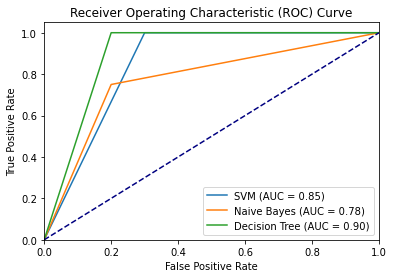

In [36]:
base_models_result = model_training_conf(base_models)

> Implement ensemble techniques:
- o Bagging: Train a Random Forest classifier.
- o Boosting: Train an AdaBoost classifier.
- o Stacking: Train a meta-model using predictions from base models

In [28]:
#ensemble
ensemble = {
    "Random Fores":RandomForestClassifier(),
    "Ada boost":AdaBoostClassifier(),
    "Stacking":VotingClassifier(estimators=[("naive bayes",base_models['Naive Bayes']),
                                           ("Decision Tree",base_models['Decision Tree']),
                                           ("SVM",base_models['SVM'])],voting='hard')
}

### Evaluation of ensemble

Visualize the performance metrics using plots like confusion matrix and ROC curve

Random Fores Accuracy: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.75      0.75      0.75         4

    accuracy                           0.86        14
   macro avg       0.82      0.82      0.82        14
weighted avg       0.86      0.86      0.86        14

Confusion Matrix:
[[9 1]
 [1 3]]

Ada boost Accuracy: 0.7857142857142857
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.67      0.50      0.57         4

    accuracy                           0.79        14
   macro avg       0.74      0.70      0.71        14
weighted avg       0.77      0.79      0.78        14

Confusion Matrix:
[[9 1]
 [2 2]]

Stacking Accuracy: 0.7857142857142857
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.60      0.75      0.67       

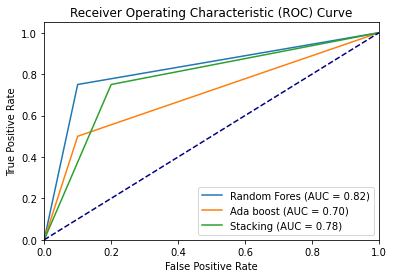

In [37]:
ensemble_models_result = model_training_conf(ensemble)

4. Analysis

Compare the performance of individual models with ensemble methods.

In [48]:
base_df = pd.DataFrame(base_models_result)
base_df.head()

,Model,Accuracy,Precision,Recall,F1 Score
0,SVM,0.785714,0.571429,1.00,0.727273
1,Naive Bayes,0.785714,0.600000,0.75,0.666667
2,Decision Tree,0.857143,0.666667,1.00,0.800000


In [49]:
ensembled_df = pd.DataFrame(ensemble_models_result)
ensembled_df.head()

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Fores,0.857143,0.750000,0.75,0.750000
1,Ada boost,0.785714,0.666667,0.50,0.571429
2,Stacking,0.785714,0.600000,0.75,0.666667


 Discuss the strengths and weaknesses of each approach.

1. Random Forest:

> Strengths:
- High accuracy (0.857)
- Good precision (0.75) and recall (0.75)
- Balanced F1 score (0.75)
> Weaknesses:
- Precision and recall could be slightly improved for better balance.

2. AdaBoost:

> Strengths:
- Decent accuracy (0.786)
- Moderate precision (0.667) and recall (0.5)
> Weaknesses:
- Lower recall compared to Random Forest.
- F1 score is relatively low (0.571).

3. Stacking:

> Strengths:
- Similar accuracy to AdaBoost (0.786).
- Good recall (0.75).
> Weaknesses:
- Lower precision (0.6) compared to other models.
- F1 score could be improved for better balance.

4. SVM:

> Strengths:
- High recall (1.0), meaning it correctly identifies all positive instances.
- Decent accuracy (0.786).
> Weaknesses:
- Lower precision (0.571), indicating it might label some negative instances as positive incorrectly.
- F1 score is lower due to precision-recall imbalance (0.727).

5. Naive Bayes:

> Strengths:
- Balanced precision (0.6) and recall (0.75).
- Decent accuracy (0.786).
> Weaknesses:
- Similar to Stacking, precision could be improved for better balance.
- F1 score indicates room for improvement (0.667).

6. Decision Tree:

> Strengths:
- High accuracy (0.857).
- Perfect recall (1.0), meaning it correctly identifies all positive instances.
> Weaknesses:
- Precision could be slightly improved for better balance (0.667).
- F1 score indicates a slight imbalance between precision and recall (0.8).



Explore potential improvements or modifications to the ensemble methods

### Random Forest and Decision Tree perform well overall, with high accuracy and balanced precision-recall trade-offs. However, some models like AdaBoost and Stacking could benefit from improving their precision and F1 scores

> 1. Hyper parameter tuning
> 2. Cross Validation

- ## Using grid search cv and doing hyper parameter tuning for optimization and better results

In [54]:

# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required at each leaf node
}

# Define the parameter grid for AdaBoost
adb_param_grid = {
    'n_estimators': [50, 100, 150],  # Number of weak learners
    'learning_rate': [0.01, 0.1, 1.0] # Learning rate
}

# Initialize models with default parameters
rf_model = RandomForestClassifier()
adb_model = AdaBoostClassifier()

# Perform grid search for Random Forest
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train_tfidf, y_train)

# Perform grid search for AdaBoost
adb_grid_search = GridSearchCV(adb_model, adb_param_grid, cv=5, scoring='accuracy')
adb_grid_search.fit(X_train_tfidf, y_train)

best_rf_params = rf_grid_search.best_params_
best_adb_params = adb_grid_search.best_params_

rf_model.set_params(**best_rf_params)
adb_model.set_params(**best_adb_params)

ensemble_models = [
    ("Random Forest", rf_model),
    ("AdaBoost", adb_model),
    ("Voting Classifier", VotingClassifier(estimators=[('nb', base_models['Naive Bayes']),
                                                        ('dt', base_models['Decision Tree']),
                                                        ('svm', base_models['SVM'])], voting='hard'))
]

# Train ensemble models
for name, model in ensemble_models:
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(f"{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

Random Forest Accuracy: 0.7857142857142857
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.67      0.50      0.57         4

    accuracy                           0.79        14
   macro avg       0.74      0.70      0.71        14
weighted avg       0.77      0.79      0.78        14

Confusion Matrix:
[[9 1]
 [2 2]]

AdaBoost Accuracy: 0.7857142857142857
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.67      0.50      0.57         4

    accuracy                           0.79        14
   macro avg       0.74      0.70      0.71        14
weighted avg       0.77      0.79      0.78        14

Confusion Matrix:
[[9 1]
 [2 2]]

Voting Classifier Accuracy: 0.7857142857142857
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.60      0.75      0.

## Answer the following question:
1. What could the Airbnb marketing team offer to improve its users’ experience? Should it rank properties it suggested to users based on some metric such as review sentiment? How would review sentiment compare to summary-rating value in terms of its ability to predict revenues? 

Answer:
    Airbnb marketing team offer can be review sentiments and ratings joint performance calculation. They should rank properties based on review sentiments metrics along with considering ratings this is because someone can give good rating(4.0) and give poor feedback. Such cases can be dealt with considering reviews sentiments along with ratings analysis like ensemble learning algorithms.
    Moreover, Certain classification models have been applied to optimize the learning error and improve accuracy. Among the basic models 'Decision Tree' provided 85% accuracy and 100% recall providing great precision and true positive rate. Whereas, in ensemble learning models we have Random Forest that gives 85% accuracy, 75% recall and 75% F1score, Providing better classification.
     Review feelings are important because they show how guests really felt, which can help people decide where to stay. This could make Airbnb predict better which places will get more bookings and make more money.
    
2. Given what we know about the performance of properties in Miami and Paris, did Airbnb need a region-specific strategy? Could the company suggest optimal pricing for hosts, or suggest other ways hosts could improve overall earnings?

Answer:
    In context of hosts, review sentiments play important role as based on such evaluation metric,the hosts can maximize their buissness profits. 
    Airbnb does not need region-specific strategy for improving performance of properties, a better strategy would be the correlation of review sentiment based on ratings, so it can be easier for the model to find optimatal patterns for property hosting performance. Parts of speech or POS tagging along with location data can be useful in such case. 